<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Sarima_arima_o_fpressure_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
df=pd.read_csv('pressure.csv')
df.head()

,created_at,pressure
0,2022-02-05 07:03:27 UTC,509.97
1,2022-02-05 07:03:49 UTC,509.26
2,2022-02-05 07:04:10 UTC,509.13
3,2022-02-05 07:04:31 UTC,509.69
4,2022-02-05 07:04:52 UTC,509.98


In [200]:
df.tail()

,created_at,pressure
399,2022-02-12 09:35:47 UTC,543.53
400,2022-02-12 09:36:15 UTC,538.03
401,2022-02-12 09:36:31 UTC,535.56
402,2022-02-12 09:36:52 UTC,533.33
403,2022-02-12 09:37:21 UTC,589.49


In [202]:
df.colunms=["created_at	","pressure"]
df.head()

,created_at,pressure
0,2022-02-05 07:03:27 UTC,509.97
1,2022-02-05 07:03:49 UTC,509.26
2,2022-02-05 07:04:10 UTC,509.13
3,2022-02-05 07:04:31 UTC,509.69
4,2022-02-05 07:04:52 UTC,509.98


In [203]:
df.tail()

,created_at,pressure
399,2022-02-12 09:35:47 UTC,543.53
400,2022-02-12 09:36:15 UTC,538.03
401,2022-02-12 09:36:31 UTC,535.56
402,2022-02-12 09:36:52 UTC,533.33
403,2022-02-12 09:37:21 UTC,589.49


In [204]:
df['created_at']=pd.to_datetime(df["created_at"])

In [205]:
df.head()

,created_at,pressure
0,2022-02-05 07:03:27+00:00,509.97
1,2022-02-05 07:03:49+00:00,509.26
2,2022-02-05 07:04:10+00:00,509.13
3,2022-02-05 07:04:31+00:00,509.69
4,2022-02-05 07:04:52+00:00,509.98


In [206]:
df.set_index("created_at",inplace=True)

In [207]:
df.head()

,pressure
created_at,
2022-02-05 07:03:27+00:00,509.97
2022-02-05 07:03:49+00:00,509.26
2022-02-05 07:04:10+00:00,509.13
2022-02-05 07:04:31+00:00,509.69
2022-02-05 07:04:52+00:00,509.98


In [208]:
df.shape

(404, 1)

In [209]:
df.describe()

,pressure
count,404.000000
mean,541.329233
std,28.178518
min,498.490000
25%,510.045000
50%,544.475000
75%,568.497500
max,592.890000


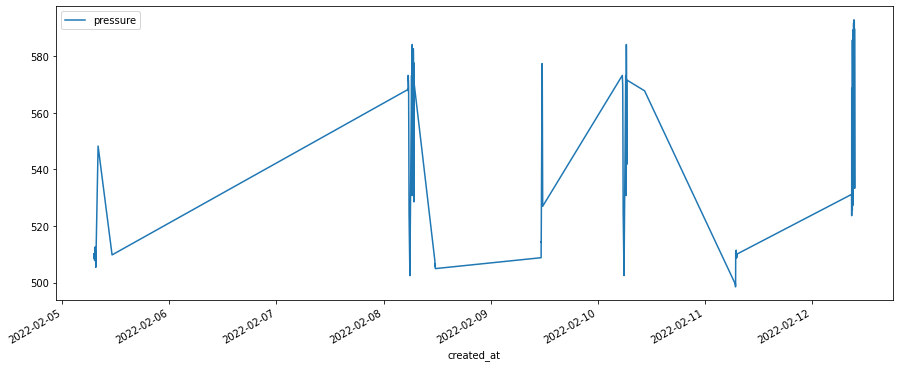

In [210]:
df.plot(figsize=(15,6))
plt.show()

In [211]:
from statsmodels.tsa.stattools import adfuller

In [213]:
test_result=adfuller(df['pressure'])

In [214]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(	pressure):
    result=adfuller(	pressure)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [215]:
adfuller_test(df['pressure'])

ADF Test Statistic : -4.390897967570683
p-value : 0.0003080380068537353
#Lags Used : 0
Number of Observations Used : 403
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [218]:
df['pr6essureFirst Difference'] = df['pressure'] - df['pressure'].shift(1)

In [219]:
df['pressure'].shift(1)

created_at
2022-02-05 07:03:27+00:00       NaN
2022-02-05 07:03:49+00:00    509.97
2022-02-05 07:04:10+00:00    509.26
2022-02-05 07:04:31+00:00    509.13
2022-02-05 07:04:52+00:00    509.69
                              ...  
2022-02-12 09:35:47+00:00    546.27
2022-02-12 09:36:15+00:00    543.53
2022-02-12 09:36:31+00:00    538.03
2022-02-12 09:36:52+00:00    535.56
2022-02-12 09:37:21+00:00    533.33
Name: pressure, Length: 404, dtype: float64

In [220]:
df['Seasonal First Difference']=df['pressure']-df['pressure'].shift(12)

In [221]:
df.head(14)

,pressure,pr6essureFirst Difference,Seasonal First Difference
created_at,,,
2022-02-05 07:03:27+00:00,509.97,NaN,NaN
2022-02-05 07:03:49+00:00,509.26,-0.71,NaN
2022-02-05 07:04:10+00:00,509.13,-0.13,NaN
2022-02-05 07:04:31+00:00,509.69,0.56,NaN
2022-02-05 07:04:52+00:00,509.98,0.29,NaN
2022-02-05 07:05:13+00:00,508.98,-1.00,NaN
2022-02-05 07:05:34+00:00,508.65,-0.33,NaN
2022-02-05 07:05:56+00:00,508.79,0.14,NaN
2022-02-05 07:06:32+00:00,509.33,0.54,NaN


In [222]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.638144439780863
p-value : 0.00010979794356568674
#Lags Used : 13
Number of Observations Used : 378
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


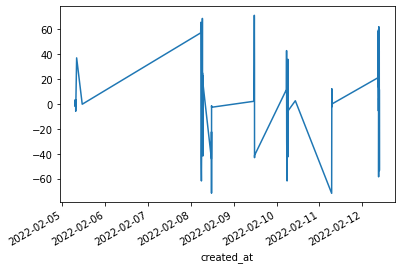

In [223]:
df['Seasonal First Difference'].plot()

In [ ]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [226]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

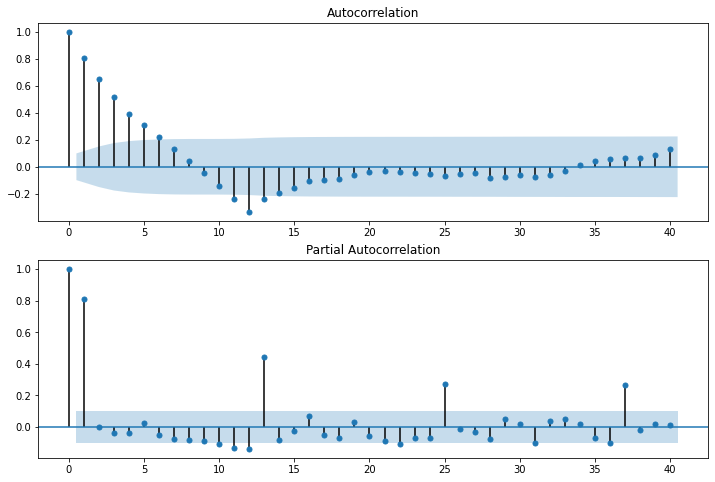

In [227]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [235]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['pressure'],order=(1,1,1))
model_fit=model.fit()

In [237]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Turbiidity   No. Observations:                  526
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3949.623
Method:                       css-mle   S.D. of innovations            441.206
Date:                Sat, 26 Mar 2022   AIC                           7907.247
Time:                        05:24:15   BIC                           7924.308
Sample:                             1   HQIC                          7913.927
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8168      6.967      0.261      0.794     -11.839      15.473
ar.L1.D.Turbiidity     0.4718      0.072      6.586      0.000       0.331       0.612
ma.L1.D.Turbiidity    -0.8099      0.048    -16.800      0.000      -0.904      -0.715
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1197           +0.0000j            2.1197            0.0000
MA.1            1.2346           +0.0000j            1.2346            0.0000
-----------------------------------------------------------------------------
"""

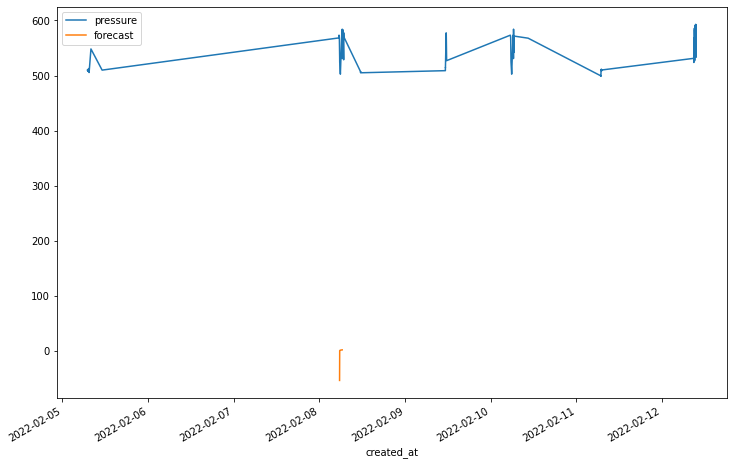

In [239]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['pressure','forecast']].plot(figsize=(12,8))

In [240]:
import statsmodels.api as sm

In [242]:
model=sm.tsa.statespace.SARIMAX(df['pressure'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


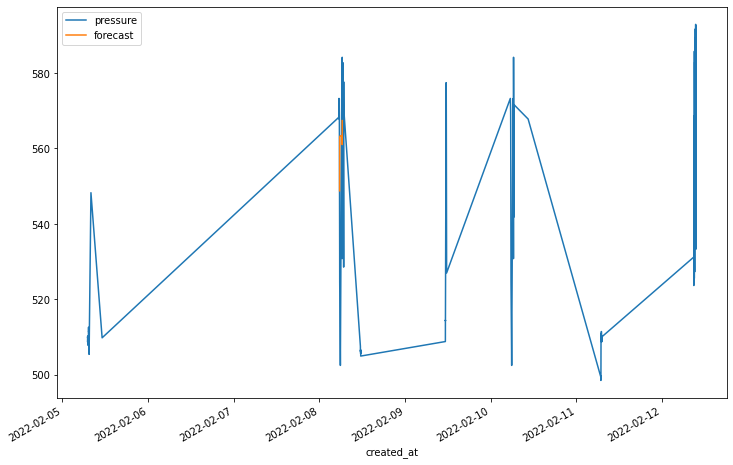

In [243]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['pressure','forecast']].plot(figsize=(12,8))

In [244]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [245]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [246]:
future_datest_df.tail()

,pressure,pr6essureFirst Difference,Seasonal First Difference,forecast
2023-09-12 09:37:21+00:00,NaN,NaN,NaN,NaN
2023-10-12 09:37:21+00:00,NaN,NaN,NaN,NaN
2023-11-12 09:37:21+00:00,NaN,NaN,NaN,NaN
2023-12-12 09:37:21+00:00,NaN,NaN,NaN,NaN
2024-01-12 09:37:21+00:00,NaN,NaN,NaN,NaN


In [248]:
future_df=pd.concat([df,future_datest_df])

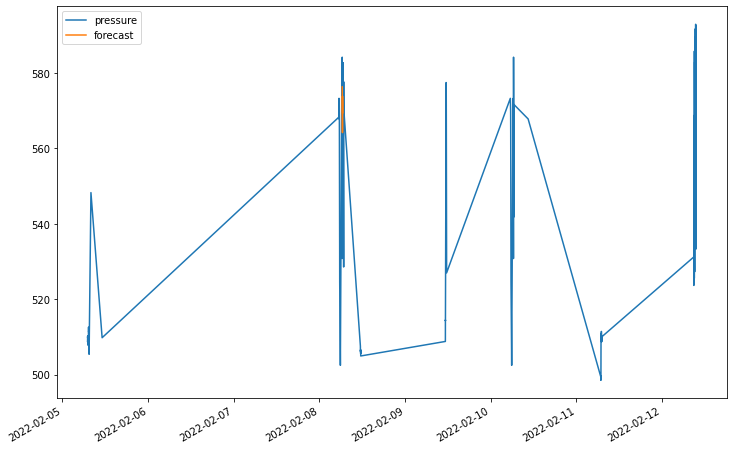

In [249]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['pressure', 'forecast']].plot(figsize=(12, 8)) 